In [81]:
ExpandNCM[(h : NonCommutativeMultiply)[a___, b_Plus, c___]] := 
 Distribute[h[a, b, c], Plus, h, Plus, ExpandNCM[h[##]] &]
ExpandNCM[(h : NonCommutativeMultiply)[a___, b_Times, c___]] := 
 Most[b] ExpandNCM[
   h[a, Last[b], c]] (* last must be a noncommutative variable *)

ExpandNCM[a_] := ExpandAll[a]
ExpandNCM[Plus[a_, b__]] := ExpandNCM[a] + ExpandNCM[Plus[b]];
ExpandNCM[Times[a_, b__]] := Expand[ExpandNCM[a] ExpandNCM[Times[b]]];

Unprotect[NonCommutativeMultiply];
ClearAll[NonCommutativeMultiply]; 
SetAttributes[NonCommutativeMultiply, OneIdentity];
NonCommutativeMultiply[a_] := a;
NonCommutativeMultiply[a___, x_?NumericQ, b___] := x a ** b;
SetAttributes[NonCommutativeMultiply, Flat];
NonCommutativeMultiply[a___, x^c_., x^d_., b___] := 
  a ** x^(c + d) ** b;
NonCommutativeMultiply[a___, y^c_., y^d_., b___] := 
  a ** y^(c + d) ** b;
  
XYtoZ[Times[a_, b__]] := Expand[XYtoZ[a] XYtoZ[Times[b]]];
XYtoZ[Plus[a_, b__]] := XYtoZ[a] + XYtoZ[Plus[b]];
XYtoZ[NonCommutativeMultiply[x^a_., y^b_., c___]] := 
  Subscript[z, a + 1] ** XYtoZ[y^(b - 1) ** c];
XYtoZ[NonCommutativeMultiply[y^b_., c___]] := 
  Subscript[z, 1] ** XYtoZ[y^(b - 1) ** c];
XYtoZ[y^b_.] := Subscript[z, 1] ** XYtoZ[y^(b - 1)];
XYtoZ[a_] := a;
ZtoXY[a_] := a /. Subscript[z, p_] -> x^(p - 1) ** y;

Harmonic[NonCommutativeMultiply[Subscript[z, p_], a__] | Subscript[z, 
    p_], NonCommutativeMultiply[Subscript[z, q_], b__] | Subscript[z, 
    q_]] := Subscript[z, p] ** (Harmonic[a, Subscript[z, q] ** b]) + 
   Subscript[z, q] ** (Harmonic[Subscript[z, p] ** a, b]) + 
   Subscript[z, p + q] ** (Harmonic[a, b]);
Harmonic[a_] := a;
Harmonic[] = 1;

Shuffle[NonCommutativeMultiply[x_Symbol^a_., c___] | x_Symbol^a_., 
   NonCommutativeMultiply[y_Symbol^b_., d___] | y_Symbol^b_.] := 
  x ** (Shuffle[x^(a - 1) ** c, y^b ** d]) + 
   y ** (Shuffle[x^a ** c, y^(b - 1) ** d]);
   
Shuffle[Plus[x_Symbol^a_.,y_Symbol^b_.]| x_Symbol^a_.| y_Symbol^b_.,z_Symbol^c_.| z_Symbol^c_.]:=Shuffle[x^a,z^c]+Shuffle[y^b,z^c]
Shuffle[Times[x_Symbol^a_., c___] | x_Symbol^a_., 
    Times[y_Symbol^b_., d___] | y_Symbol^b_.] := d*c*Shuffle[x^a,y^b];
Shuffle[a_] := a;
Shuffle[a_?NumericQ, b_] := a b;
Shuffle[a_, b_?NumericQ] := a b;
Shuffle[] = 1;

Regsha[Times[a_, b__]] := Expand[Regsha[a] Regsha[Times[b]]];
Regsha[Plus[a_, b__]] := Regsha[a] + Regsha[Plus[b]];
Regsha[NonCommutativeMultiply[y^b_., x^a_., c___]] := (-1)^b x ** 
    Shuffle[y^b, x^(a - 1) ** c];
Regsha[a_] := a;

In [37]:
Rtest[i1_,j1_]:=
Subscript[\[Lambda],1]^i1 Subscript[\[Xi],1]^j1 y**Shuffle[y^i1,x^j1]//ExpandNCM;

Ltest[i2_,j2_]:=
Subscript[\[Lambda],2]^i2 Subscript[\[Xi],2]^j2 y**Shuffle[y^i2,x^j2]//ExpandNCM;

LHS[i1_,i2_,j1_,j2_]:=Shuffle[Rtest[i1,j1],Ltest[i2,j2]]//ExpandNCM;

2     2      2         2           2                         2
Shuffle[y  ** x  λ  ξ   + y ** x  ** y λ  ξ   + y ** x ** y ** x λ  ξ  , 
                  1  1                  1  1                      1  1
 
     2     2      2         2           2                         2
>   y  ** x  λ  ξ   + y ** x  ** y λ  ξ   + y ** x ** y ** x λ  ξ  ]
              2  2                  2  2                      2  2
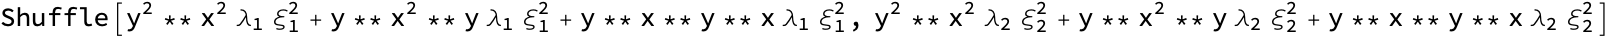

In [41]:
LHS[1,1,2,2]

In [565]:
R1[i1_,i2_,j1_,j2_]:=
Subscript[\[Lambda],1]^i1 (Subscript[\[Lambda],1]+Subscript[\[Lambda],2])^i2 Subscript[\[Xi],1]^j1(Subscript[\[Xi],1]+Subscript[\[Xi],2])^j2 y**Shuffle[y^i1,x^j1]**y**Shuffle[y^i2,x^j2]//ExpandNCM; 

R2[i1_,i2_,j1_,j2_]:=
(Subscript[\[Lambda],1]+Subscript[\[Lambda],2])^i1 (Subscript[\[Lambda],2])^i2 (Subscript[\[Xi],1]+Subscript[\[Xi],2])^j1(Subscript[\[Xi],2])^j2 y**Shuffle[y^i1,x^j1]**y**Shuffle[y^i2,x^j2]//ExpandNCM;

RHS[i1_,i2_,j1_,j2_]:=R1[i1,i2,j1,j2]+R2[i1,i2,j1,j2]//ExpandNCM

DLR[i1_,i2_,j1_,j2_]:=RHS[i1,i2,j1,j2]-LHS[i1,i2,j1,j2]

# DLR[1,0,0,0]

In [1]:
DD={{0,2,2,33},{2,0,5,2},{2,5,0,3},{33,2,3,0}};
EE={{0,3},{3,0}};
Dtes={{0,5,5,16},{5,0,4,5},{5,4,0,5},{16,5,5,0}};
F={{0,2,2,33,8,8,5,6,19},
{2,0,5,2,49,34,36,18,25},
{2,5,0,3,1,33,23,25,12},
{33,2,3,0,1,0,11,8,8},
{8,49,1,1,0,1,0,10,7},
{8,34,33,0,1,0,1,0,13},
{5,36,23,11,0,1,0,3,1},
{6,18,25,8,10,0,3,0,3},
{19,25,12,8,7,13,1,3,0}};
Jmatrix[N_]:=Table[1,{i,N},{j,N}];
Imatrix[N_]:=IdentityMatrix[N];
NN[D_]:=MatrixRank[D];
DtoB[D_]:=-1/2*(Imatrix[NN[D]]-1/NN[D]*Jmatrix[NN[D]]).D.(Imatrix[NN[D]]-1/NN[D]*Jmatrix[NN[D]])
ESort[D_]:=Sort[Table[{Eigensystem[DtoB[D]][[1,i]],Eigensystem[DtoB[D]][[2,i]]},{i,1,NN[D]}],#1[[1]]>#2[[1]]&]
EMatrix[B_]:= DiagonalMatrix[Table[ESort[B][[i,1]],{i,1,2}]]
TransEigenMatrix[B_]:=-Transpose[{N[ESort[B][[1,2]]]//Normalize,N[ESort[B][[2,2]]]//Normalize}]//N
AxisMatrix[D_]:=TransEigenMatrix[D].Sqrt[EMatrix[D]]//N;

In [16]:
EMatrix[DD]//N

{{16.5058, 0.}, {0., 2.49863}}

In [27]:
AxisMatrix[F]

{{1.08831, 2.19005}, {4.11861, 0.798634}, {2.29886, -1.73364}, {0.438319, -2.01943}, 
 
>   {-1.98086, -1.55005}, {-2.15621, 0.760725}, {-2.10251, 0.672493}, 
 
>   {-0.885002, 1.46957}, {-0.819517, -0.588352}}

{{0, 681, 1207, 562, 409, 838, 397, 340, 55, 446, 1219, 463, 419, 1111, 822, 1117, 1089, 
 
>    760, 94, 1303, 825, 637, 1326, 277, 228, 801, 756, 794, 643, 109, 989, 975, 328, 
 
>    1293, 51, 648, 1005, 371, 118}, 
 
>   {681, 0, 1016, 1327, 841, 1269, 243, 247, 753, 818, 1286, 1333, 15, 875, 637, 224, 
 
>    1161, 292, 1094, 391, 1350, 1320, 928, 24, 1271, 683, 334, 752, 729, 616, 252, 410, 
 
>    28, 827, 121, 362, 81, 866, 49}, 
 
>   {1207, 1016, 0, 1204, 887, 1233, 1079, 1257, 598, 125, 1195, 246, 543, 324, 429, 
 
>    806, 377, 473, 193, 590, 62, 318, 155, 1254, 176, 1067, 365, 1193, 153, 1232, 223, 
 
>    1029, 434, 226, 301, 58, 1297, 1191, 990}, 
 
>   {562, 1327, 1204, 0, 828, 1084, 313, 70, 942, 687, 73, 1112, 159, 649, 1081, 805, 
 
>    1252, 929, 727, 912, 819, 340, 967, 30, 365, 628, 125, 311, 855, 1273, 540, 169, 
 
>    372, 503, 775, 634, 742, 1016, 615}, 
 
>   {409, 841, 887, 828, 0, 788, 117, 261, 44, 667, 508, 1189, 329, 161, 553, 671, 272, 
 
>    498, 815, 1249, 403, 1024, 881, 897, 333, 593, 594, 980, 651, 350, 1071, 370, 852, 
 
>    1321, 623, 1019, 1123, 599, 960}, 
 
>   {838, 1269, 1233, 1084, 788, 0, 988, 1057, 895, 892, 830, 1062, 333, 349, 1078, 
 
>    1243, 183, 13, 771, 958, 942, 298, 630, 172, 780, 220, 655, 997, 218, 274, 382, 
 
>    423, 127, 382, 498, 1065, 561, 283, 967}, 
 
>   {397, 243, 1079, 313, 117, 988, 0, 216, 656, 1207, 964, 987, 1215, 718, 279, 60, 
 
>    996, 97, 1142, 697, 53, 1206, 1098, 185, 747, 95, 260, 652, 1270, 811, 635, 344, 
 
>    376, 473, 709, 672, 577, 915, 798}, 
 
>   {340, 247, 1257, 70, 261, 1057, 216, 0, 354, 880, 171, 254, 156, 418, 92, 481, 1197, 
 
>    1267, 1308, 1076, 1061, 891, 1073, 1350, 101, 851, 1327, 281, 1116, 404, 557, 14, 
 
>    497, 545, 1197, 772, 1226, 695, 238}, 
 
>   {55, 753, 598, 942, 44, 895, 656, 354, 0, 126, 808, 1060, 1174, 1356, 405, 730, 275, 
 
>    970, 777, 1266, 376, 1201, 948, 11, 516, 16, 1147, 1034, 150, 704, 334, 189, 1063, 
 
>    1131, 790, 737, 60, 1181, 1344}, 
 
>   {446, 818, 125, 687, 667, 892, 1207, 880, 126, 0, 639, 120, 624, 1023, 536, 550, 94, 
 
>    37, 1006, 477, 971, 395, 1258, 190, 1134, 308, 1120, 1254, 873, 1388, 241, 143, 
 
>    812, 1021, 939, 1021, 81, 798, 1119}, 
 
>   {1219, 1286, 1195, 73, 508, 830, 964, 171, 808, 639, 0, 1071, 282, 264, 44, 886, 
 
>    384, 498, 881, 1065, 672, 1206, 897, 370, 339, 879, 521, 477, 544, 1054, 13, 18, 
 
>    993, 820, 1118, 306, 838, 193, 422}, 
 
>   {463, 1333, 246, 1112, 1189, 1062, 987, 254, 1060, 120, 1071, 0, 866, 1298, 26, 286, 
 
>    808, 1037, 838, 1184, 831, 952, 86, 990, 266, 1186, 841, 365, 1303, 523, 365, 116, 
 
>    348, 480, 403, 755, 34, 594, 744}, 
 
>   {419, 15, 543, 159, 329, 333, 1215, 156, 1174, 624, 282, 866, 0, 1039, 1232, 441, 
 
>    1357, 965, 473, 647, 558, 1167, 1327, 132, 329, 1071, 767, 814, 439, 633, 812, 173, 
 
>    922, 260, 952, 303, 234, 646, 549}, 
 
>   {1111, 875, 324, 649, 161, 349, 718, 418, 1356, 1023, 264, 1298, 1039, 0, 846, 231, 
 
>    550, 13, 415, 769, 578, 575, 1169, 913, 53, 855, 365, 625, 707, 1084, 783, 325, 
 
>    953, 1093, 838, 381, 16, 790, 653}, 
 
>   {822, 637, 429, 1081, 553, 1078, 279, 92, 405, 536, 44, 26, 1232, 846, 0, 551, 109, 
 
>    227, 1171, 1097, 1320, 1033, 602, 1133, 749, 453, 418, 976, 534, 370, 305, 1348, 
 
>    313, 348, 388, 1296, 873, 79, 1137}, 
 
>   {1117, 224, 806, 805, 671, 1243, 60, 481, 730, 550, 886, 286, 441, 231, 551, 0, 
 
>    1047, 1342, 515, 1086, 215, 1275, 50, 744, 1099, 45, 1163, 853, 855, 370, 321, 236, 
 
>    1354, 194, 858, 750, 750, 829, 116}, 
 
>   {1089, 1161, 377, 1252, 272, 183, 996, 1197, 275, 94, 384, 808, 1357, 550, 109, 
 
>    1047, 0, 611, 12, 608, 414, 582, 61, 659, 676, 32, 853, 1186, 1185, 436, 912, 247, 
 
>    651, 77, 1079, 812, 806, 970, 976}, 
 
>   {760, 292, 473, 929, 498, 13, 97, 1267, 970, 37, 498, 1037, 965, 13, 227, 1342, 611, 
 
>    0, 647, 906, 1311, 901, 381, 267, 883, 263, 1405, 994, 216, 488, 635, 942, 292, 
 
>    141

In [29]:
BIG=-BIG

{{0, -681, -1207, -562, -409, -838, -397, -340, -55, -446, -1219, -463, -419, -1111, 
 
>    -822, -1117, -1089, -760, -94, -1303, -825, -637, -1326, -277, -228, -801, -756, 
 
>    -794, -643, -109, -989, -975, -328, -1293, -51, -648, -1005, -371, -118}, 
 
>   {-681, 0, -1016, -1327, -841, -1269, -243, -247, -753, -818, -1286, -1333, -15, 
 
>    -875, -637, -224, -1161, -292, -1094, -391, -1350, -1320, -928, -24, -1271, -683, 
 
>    -334, -752, -729, -616, -252, -410, -28, -827, -121, -362, -81, -866, -49}, 
 
>   {-1207, -1016, 0, -1204, -887, -1233, -1079, -1257, -598, -125, -1195, -246, -543, 
 
>    -324, -429, -806, -377, -473, -193, -590, -62, -318, -155, -1254, -176, -1067, 
 
>    -365, -1193, -153, -1232, -223, -1029, -434, -226, -301, -58, -1297, -1191, -990}, 
 
>   {-562, -1327, -1204, 0, -828, -1084, -313, -70, -942, -687, -73, -1112, -159, -649, 
 
>    -1081, -805, -1252, -929, -727, -912, -819, -340, -967, -30, -365, -628, -125, 
 
>    -311, -855, -1273, -540, -169, -372, -503, -775, -634, -742, -1016, -615}, 
 
>   {-409, -841, -887, -828, 0, -788, -117, -261, -44, -667, -508, -1189, -329, -161, 
 
>    -553, -671, -272, -498, -815, -1249, -403, -1024, -881, -897, -333, -593, -594, 
 
>    -980, -651, -350, -1071, -370, -852, -1321, -623, -1019, -1123, -599, -960}, 
 
>   {-838, -1269, -1233, -1084, -788, 0, -988, -1057, -895, -892, -830, -1062, -333, 
 
>    -349, -1078, -1243, -183, -13, -771, -958, -942, -298, -630, -172, -780, -220, 
 
>    -655, -997, -218, -274, -382, -423, -127, -382, -498, -1065, -561, -283, -967}, 
 
>   {-397, -243, -1079, -313, -117, -988, 0, -216, -656, -1207, -964, -987, -1215, -718, 
 
>    -279, -60, -996, -97, -1142, -697, -53, -1206, -1098, -185, -747, -95, -260, -652, 
 
>    -1270, -811, -635, -344, -376, -473, -709, -672, -577, -915, -798}, 
 
>   {-340, -247, -1257, -70, -261, -1057, -216, 0, -354, -880, -171, -254, -156, -418, 
 
>    -92, -481, -1197, -1267, -1308, -1076, -1061, -891, -1073, -1350, -101, -851, 
 
>    -1327, -281, -1116, -404, -557, -14, -497, -545, -1197, -772, -1226, -695, -238}, 
 
>   {-55, -753, -598, -942, -44, -895, -656, -354, 0, -126, -808, -1060, -1174, -1356, 
 
>    -405, -730, -275, -970, -777, -1266, -376, -1201, -948, -11, -516, -16, -1147, 
 
>    -1034, -150, -704, -334, -189, -1063, -1131, -790, -737, -60, -1181, -1344}, 
 
>   {-446, -818, -125, -687, -667, -892, -1207, -880, -126, 0, -639, -120, -624, -1023, 
 
>    -536, -550, -94, -37, -1006, -477, -971, -395, -1258, -190, -1134, -308, -1120, 
 
>    -1254, -873, -1388, -241, -143, -812, -1021, -939, -1021, -81, -798, -1119}, 
 
>   {-1219, -1286, -1195, -73, -508, -830, -964, -171, -808, -639, 0, -1071, -282, -264, 
 
>    -44, -886, -384, -498, -881, -1065, -672, -1206, -897, -370, -339, -879, -521, 
 
>    -477, -544, -1054, -13, -18, -993, -820, -1118, -306, -838, -193, -422}, 
 
>   {-463, -1333, -246, -1112, -1189, -1062, -987, -254, -1060, -120, -1071, 0, -866, 
 
>    -1298, -26, -286, -808, -1037, -838, -1184, -831, -952, -86, -990, -266, -1186, 
 
>    -841, -365, -1303, -523, -365, -116, -348, -480, -403, -755, -34, -594, -744}, 
 
>   {-419, -15, -543, -159, -329, -333, -1215, -156, -1174, -624, -282, -866, 0, -1039, 
 
>    -1232, -441, -1357, -965, -473, -647, -558, -1167, -1327, -132, -329, -1071, -767, 
 
>    -814, -439, -633, -812, -173, -922, -260, -952, -303, -234, -646, -549}, 
 
>   {-1111, -875, -324, -649, -161, -349, -718, -418, -1356, -1023, -264, -1298, -1039, 
 
>    0, -846, -231, -550, -13, -415, -769, -578, -575, -1169, -913, -53, -855, -365, 
 
>    -625, -707, -1084, -783, -325, -953, -1093, -838, -381, -16, -790, -653}, 
 
>   {-822, -637, -429, -1081, -553, -1078, -279, -92, -405, -536, -44, -26, -1232, -846, 
 
>    0, -551, -109, -227, -1171, -1097, -1320, -1033, -602, -1133, -749, -453, -418, 
 
>    -976, -534, -370, -305, -1348, -313, -348, -388, -1296, -873, -79, -1137}, 
 
>   {-1117, -224, -806, -805, -671, -1243, -60, -481, -730, -550

In [ ]:
AxisMatrix[BIG]